# Group - Keyush Shah & Urvi Vaidya

### Assessment Case Study

- For this task, we will be using the Assessment dataset provided to us, which is composed of 6000 loan applicants with a range of 15 features. It is up to us to determine whether the applicant is likely to default on his/her loan, based on the attributes provided to us for each applicant. 
- The main aim of this project is to successfully predict the defaulters, according to “default” column which has two values 'yes' and 'no' for default. 
- Although WOE is the requirement, in this assignment we will be using both PCA and WOE as feature selection methods so that we can compare the outcomes using different machine learning models.
- We will run different ML models on this dataset, using both the feature extraction methods, in order to determine which is the most accurate model.

In [66]:
# we start with importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

##Mute the warnings
import warnings as w
w.filterwarnings('ignore')

In [67]:
# importing the data - Urvi
file = r'~/Downloads/Assessment Case Study Data - Finance elective.xlsx'

# importing the data - Keyush
# file = r'Assessment Case Study Data - Finance elective.xlsx'

In [68]:
# reading the data into the pandas dataframe - Urvi
data = pd.read_excel(file)

# reading the data into the pandas dataframe - Keyush
# data = pd.read_excel(file,engine='openpyxl')

# Exploratory Data Analysis

- We will do some exploratory data analysis and just see what the dataset looks like. This will give us an overview of the no of datapoints, attributes, datatypes, general description, etc. 
- We will also perform data cleaning in this step, so that we have a workable dataset. This involves checking for null values, replacing them if necessary, etc.
- At this stage we will also use different plots to visualize the data. - Visuals help us perform the initial high-level analysis. 

In [69]:
# lets have a look at the data
data.head()

,cust_id,acc_no,checking_balance,months_loan_duration,credit_history,purpose,amount (USD),savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependants,phone,default
0,6252029,625202900002,< 0 USD,12,good,car,1274,< 100 USD,< 1 year,3,1.0,37,none,own,1,unskilled,1,no,yes
1,5110070,511007000001,1 - 200 USD,36,good,car,12389,unknown,1 - 4 years,1,4.0,37,none,other,1,skilled,1,yes,yes
2,2846491,284649100002,< 0 USD,11,critical,car,3939,< 100 USD,1 - 4 years,1,2.0,40,none,own,2,unskilled,2,no,no
3,9264318,926431800001,1 - 200 USD,15,good,renovations,1308,< 100 USD,> 7 years,4,4.0,38,none,own,2,unskilled,1,no,no
4,9412980,941298000001,unknown,10,good,furniture/appliances,1924,< 100 USD,1 - 4 years,1,4.0,38,none,own,1,skilled,1,yes,no


In [70]:
# now we  see the size of the dataset
data.shape

(6000, 19)

In [71]:
# brief description of the data
data.describe()

,cust_id,acc_no,months_loan_duration,amount (USD),percent_of_income,years_at_residence,age,existing_loans_count,dependants
count,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,4680.000000,6000.000000,6000.000000,6000.000000
mean,5.490920e+06,5.490319e+11,20.903000,3271.258000,2.973000,2.848718,35.546000,1.407000,1.155000
std,2.655498e+06,2.656615e+11,12.053788,2821.560294,1.118248,1.096819,11.370727,0.577414,0.361935
min,1.001651e+06,1.001651e+10,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,3.176772e+06,3.176772e+11,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,5.435210e+06,5.435211e+11,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,7.766546e+06,7.766547e+11,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,9.999272e+06,9.999272e+11,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [72]:
# lets look at the distribution of the dafaulting and non-defaulting applicants
data['default'].value_counts()

no     4200
yes    1800
Name: default, dtype: int64

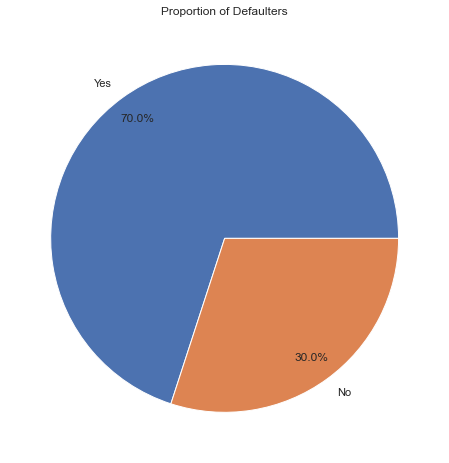

In [73]:
# lets visualize the above numbers
sizes = dict(data['default'].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Proportion of Defaulters")
plt.pie(sizes.values(), labels=['Yes', 'No'], autopct="%.1f%%", pctdistance=0.85)

plt.show()

In [9]:
# lets see the stats of the data based on the status of the defaulters
data.groupby('default').mean()

,cust_id,acc_no,months_loan_duration,amount (USD),percent_of_income,years_at_residence,age,existing_loans_count,dependants
default,,,,,,,,,
no,5.529675e+06,5.529675e+11,19.207143,2985.457143,2.920000,2.853432,36.224286,1.424286,1.155714
yes,5.400492e+06,5.398489e+11,24.860000,3938.126667,3.096667,2.838174,33.963333,1.366667,1.153333


###### - We will first check for null values and then replace them with the mean of their column as we cannot perform machine learning on datasets with null or infinity values.

In [10]:
# lets check for null values
data.isnull().any()

cust_id                 False
acc_no                  False
checking_balance        False
months_loan_duration    False
credit_history          False
purpose                 False
amount (USD)            False
savings_balance         False
employment_duration     False
percent_of_income       False
years_at_residence       True
age                     False
other_credit            False
housing                 False
existing_loans_count    False
job                     False
dependants              False
phone                   False
default                 False
dtype: bool

In [11]:
# replacing null values
column_means = data['years_at_residence'].mean()
data['years_at_residence'] = data['years_at_residence'].fillna(column_means)


In [12]:
# lets get some basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_id               6000 non-null   int64  
 1   acc_no                6000 non-null   int64  
 2   checking_balance      6000 non-null   object 
 3   months_loan_duration  6000 non-null   int64  
 4   credit_history        6000 non-null   object 
 5   purpose               6000 non-null   object 
 6   amount (USD)          6000 non-null   int64  
 7   savings_balance       6000 non-null   object 
 8   employment_duration   6000 non-null   object 
 9   percent_of_income     6000 non-null   int64  
 10  years_at_residence    6000 non-null   float64
 11  age                   6000 non-null   int64  
 12  other_credit          6000 non-null   object 
 13  housing               6000 non-null   object 
 14  existing_loans_count  6000 non-null   int64  
 15  job                  

- We will also check for object types as we cannot perform machine learning with object type values in the dataset. 
- We alreasdy know that out default column is object typoe which we need to change to numerical, 1 - 0 for 'yes' and 'no' respectively. 
- We will not change the rest of the object types just yet as we need the dataset intact to perform WOE and IV. 

In [13]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

checking_balance       4
credit_history         5
purpose                6
savings_balance        5
employment_duration    5
other_credit           3
housing                3
job                    4
phone                  2
default                2
dtype: int64

#### We will also replace the phone column along with the default column as it only has two unique values. 

In [14]:
# replacing the default values 1 for yes and 0 for no
data['default'] = data['default'].replace(['yes','no'],[1,0])

In [15]:
# replacing the phone values 1 for yes and 0 for no
data['phone'] = data['phone'].replace(['yes','no'],[1,0])

In [16]:
# lets check our changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_id               6000 non-null   int64  
 1   acc_no                6000 non-null   int64  
 2   checking_balance      6000 non-null   object 
 3   months_loan_duration  6000 non-null   int64  
 4   credit_history        6000 non-null   object 
 5   purpose               6000 non-null   object 
 6   amount (USD)          6000 non-null   int64  
 7   savings_balance       6000 non-null   object 
 8   employment_duration   6000 non-null   object 
 9   percent_of_income     6000 non-null   int64  
 10  years_at_residence    6000 non-null   float64
 11  age                   6000 non-null   int64  
 12  other_credit          6000 non-null   object 
 13  housing               6000 non-null   object 
 14  existing_loans_count  6000 non-null   int64  
 15  job                  

# Visualization

In [17]:
# Visualising the correlation matrix of the dataset.
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,cust_id,acc_no,months_loan_duration,amount (USD),percent_of_income,years_at_residence,age,existing_loans_count,dependants,phone,default
cust_id,1.000000,0.999962,-0.035665,-0.023954,-0.032548,0.003469,-0.024542,0.007862,-0.011367,-0.020340,-0.022295
acc_no,0.999962,1.000000,-0.035483,-0.023758,-0.032742,0.003199,-0.024362,0.006842,-0.011266,-0.020145,-0.022631
months_loan_duration,-0.035665,-0.035483,1.000000,0.624984,0.074749,0.026552,-0.036136,-0.011284,-0.023834,0.164718,0.214927
amount (USD),-0.023954,-0.023758,0.624984,1.000000,-0.271316,0.029897,0.032716,0.020795,0.017142,0.276995,0.154739
percent_of_income,-0.032548,-0.032742,0.074749,-0.271316,1.000000,0.010940,0.058266,0.021669,-0.071207,0.014413,0.072404
years_at_residence,0.003469,0.003199,0.026552,0.029897,0.010940,1.000000,0.228929,0.086732,0.041504,0.095102,-0.005725
age,-0.024542,-0.024362,-0.036136,0.032716,0.058266,0.228929,1.000000,0.149254,0.118201,0.145259,-0.091127
existing_loans_count,0.007862,0.006842,-0.011284,0.020795,0.021669,0.086732,0.149254,1.000000,0.109667,0.065553,-0.045732
dependants,-0.011367,-0.011266,-0.023834,0.017142,-0.071207,0.041504,0.118201,0.109667,1.000000,-0.014753,-0.003015
phone,-0.020340,-0.020145,0.164718,0.276995,0.014413,0.095102,0.145259,0.065553,-0.014753,1.000000,-0.036466


In [18]:
## Correlation with the default variable
corr_default = data.corrwith(data['default'],method = 'spearman')

In [19]:
corr_default

cust_id                -0.022453
acc_no                 -0.022453
months_loan_duration    0.205685
amount (USD)            0.087083
percent_of_income       0.073690
years_at_residence     -0.004600
age                    -0.112191
existing_loans_count   -0.047316
dependants             -0.003015
phone                  -0.036466
default                 1.000000
dtype: float64

##### * We first see the correlation of all the numeric columns and observe that there is no significant correlation between any of the features in the data.
##### * Secondly, we encode the default column and check the correlation with the target variable; we observe that the correlation has been insignificant for all the features.

We will now use a user defined function to visualise the different attributes and look at the percentage of defaulters in each category of that particular attribute. 

In [20]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = data[feature].value_counts()
    df = pd.DataFrame({feature: temp.index,'Number of loan contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = data[[feature, 'default']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='default', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,8))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(14,16))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of loan contracts",data=df)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=120)
    
    s = sns.barplot(ax=ax2, x = feature, y='default', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=120)
    plt.ylabel('Percent of target prone to defaults [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=9)

    plt.show();

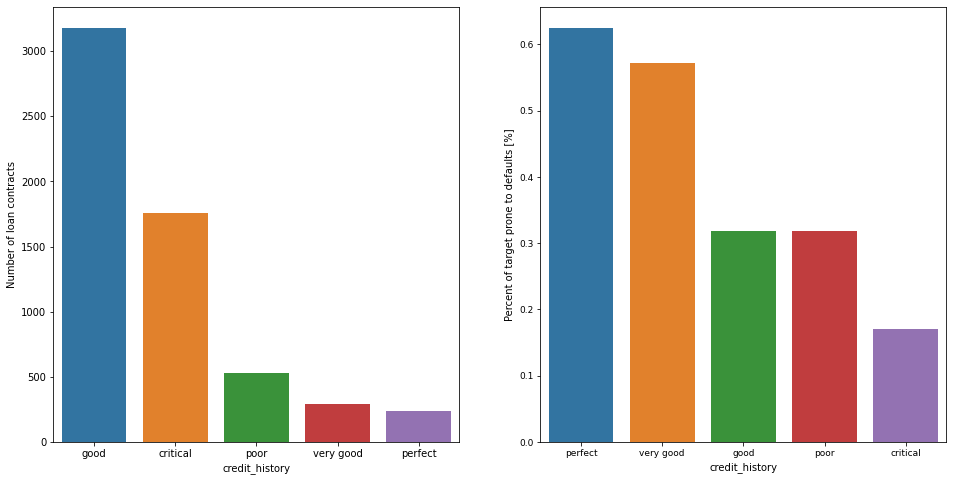

In [21]:
plot_stats('credit_history')

>> #### We can observe here that contrary to logical asssumption it is infact applicants with perfect credit history who are more prone to defaulting than vice versa. This can be better onserved below when we look at the actual numbers below.

In [22]:
pd.crosstab(data["credit_history"], data["default"])

default,0,1
credit_history,,
critical,1458,300
good,2166,1014
perfect,90,150
poor,360,168
very good,126,168


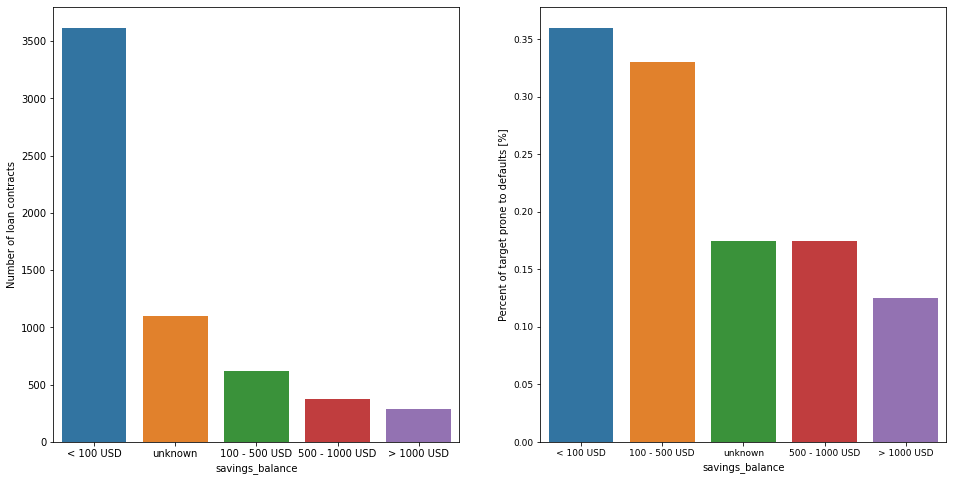

In [23]:
plot_stats('savings_balance')

>> #### Here the data behaves as per norm, where people with lower account balances appear to be more likely to default that those with higher balances.

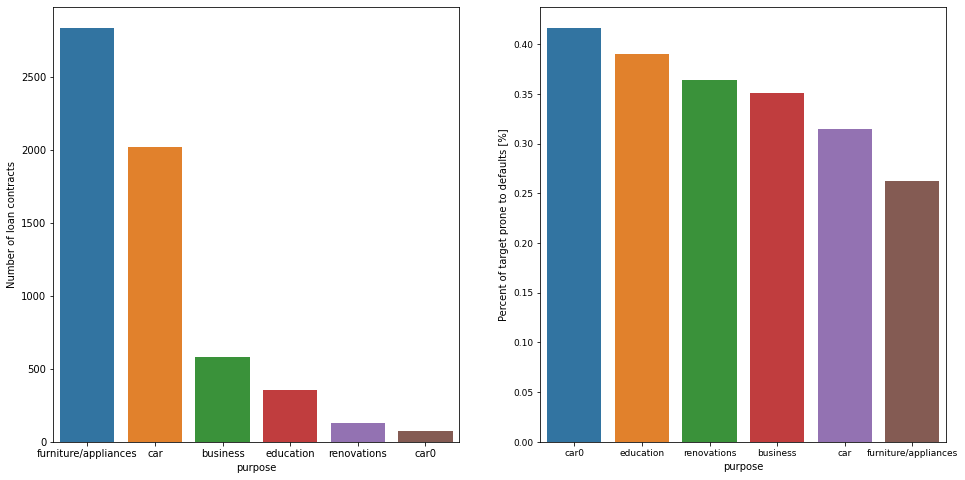

In [24]:
plot_stats('purpose')

>> #### We can observe from the above chart that although the lowest number of applicants have applied for a car0 loan they are the highest defaulters. One would assume that Car0 refers to the first car of the applicant. Additionally even though the number of loans for education and business are low they too have a high default rate. Lastly we can observe that although the above two pooints are interesting it does not give us much insight into the data pattersn as the default rate within the category is similarly distributed. 

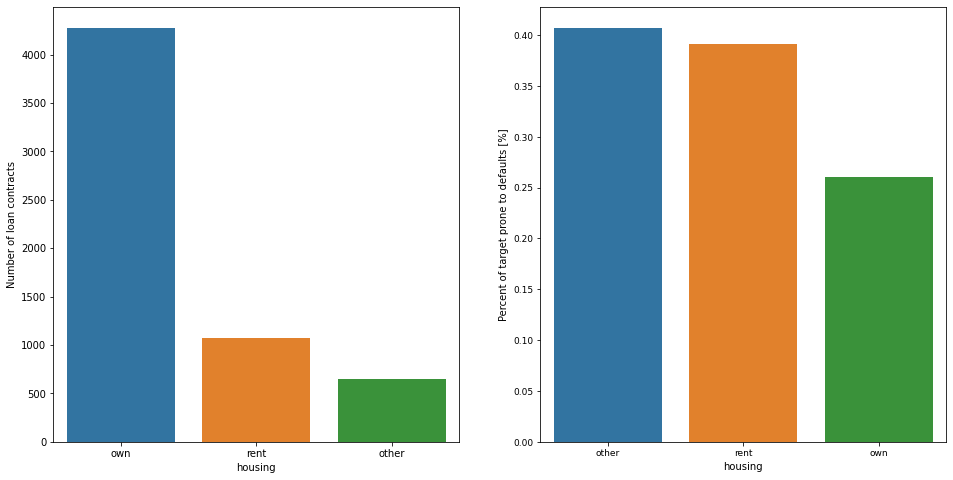

In [25]:
plot_stats('housing')

>> #### It would  appear that people who own their own home are less likely to default that those who do not, however that is not conclusive information at present.

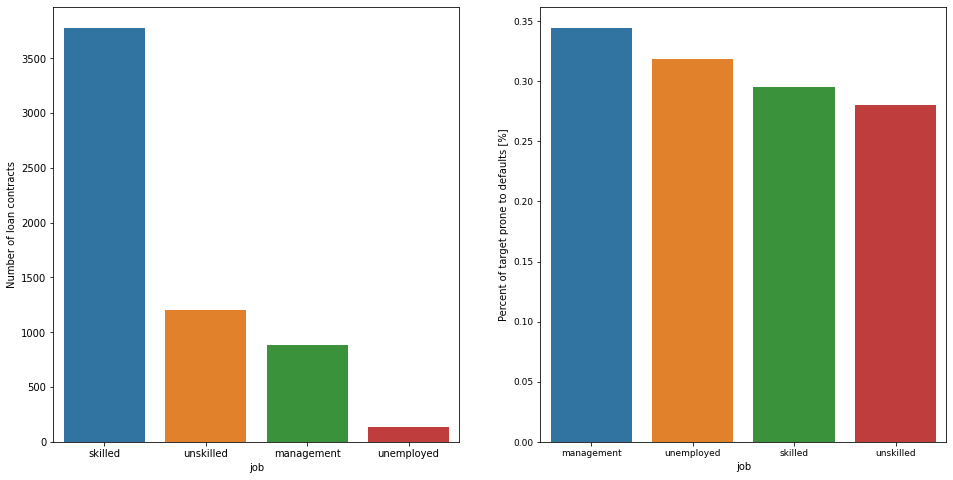

In [26]:
plot_stats('job')

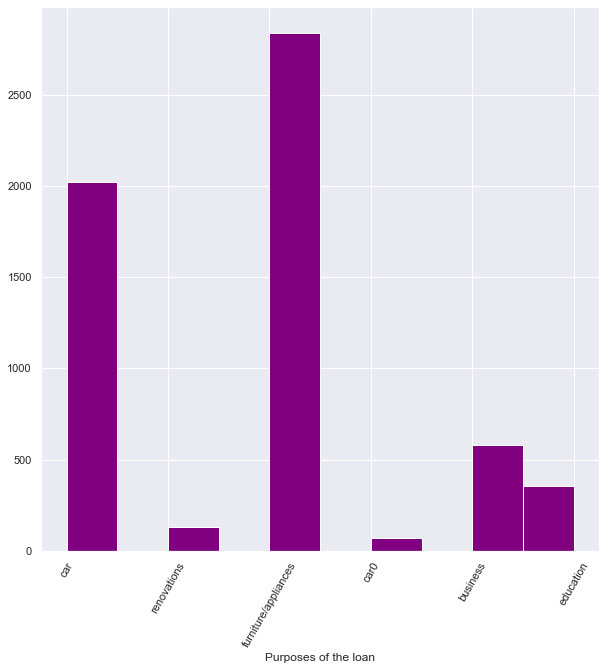

In [27]:
sns.set_theme()
plt.figure(figsize = (10,10))
plt.xlabel('Purposes of the loan')
# plt.xticks(np.arange(1,5))
plt.xticks(rotation=60)
plt.hist(data.purpose,color='purple')
plt.grid(True)
plt.show()

 >> #### The majority of the loans were taken for the purpose of buying furniture/appliances followed by car purchase.

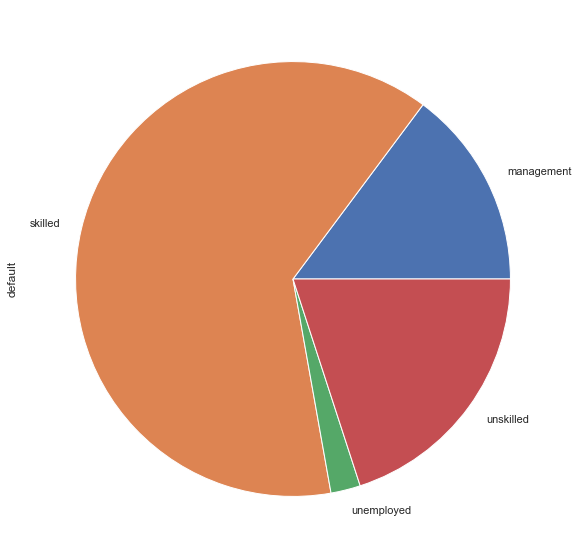

In [28]:
sns.set_theme()
plt.figure(figsize = (10,10))
data.groupby('job').default.count().plot(kind='pie')
plt.show()

>> #### This pie chart shows that people who were the most skilled hold the highest proportion in the list of defaulters, though the skilled people held the highest number of loans as per the data.

### Formulation of the Age Groups

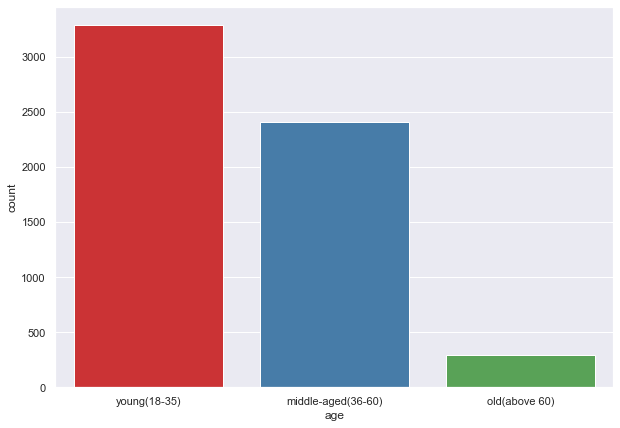

In [29]:
##Dividing the age column
bins=[18,35,60,75]
labels=['young(18-35)','middle-aged(36-60)','old(above 60)']
z=pd.cut(data['age'],bins=bins,labels=labels,right=False)
plt.figure(figsize=(10,7))
sns.countplot(z,palette="Set1")
plt.show()

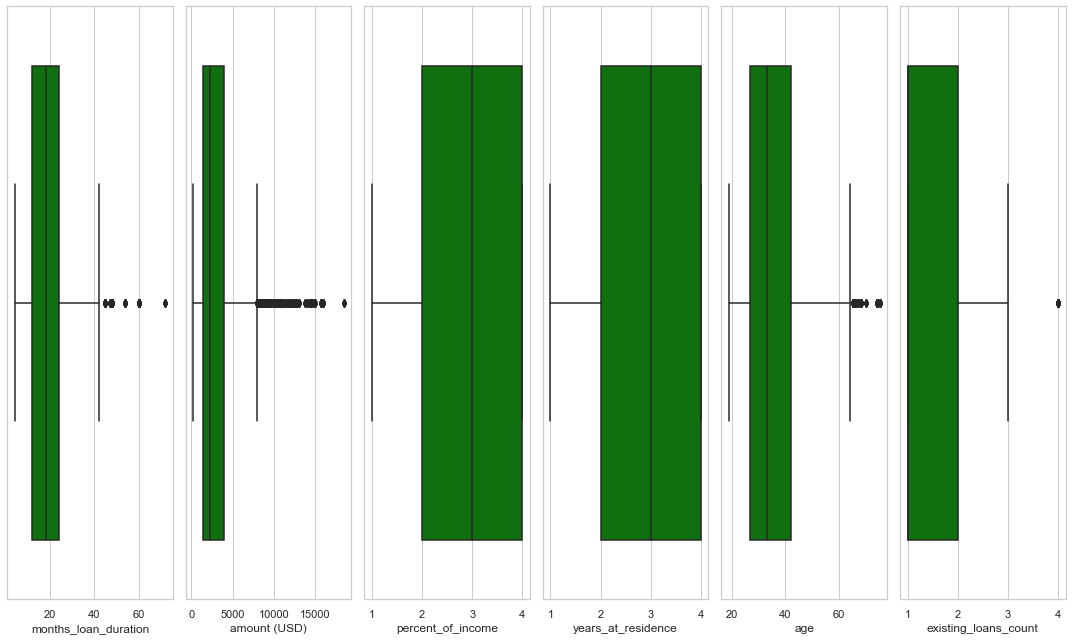

In [133]:
l = data.columns.values
l_numeric = [x for x in l if data[x].dtype!='object']
l_numeric.remove('cust_id')
l_numeric.remove('acc_no')
l_numeric.remove('dependants')
number_of_columns=9
number_of_rows = len(l_numeric)-1/number_of_columns
plt.figure(figsize=(2.5*number_of_columns,9*number_of_rows))
for i in range(0,len(l_numeric)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(x=data[l_numeric[i]],color='green',orient='v')
    plt.tight_layout()

* None of the numeric columns has outliers except amount, months_loan_duration and age. The columns age and amount are bound to have some outiers which should not be a matter of concern and the amount of outliers in the months_loan_duration is negligible.

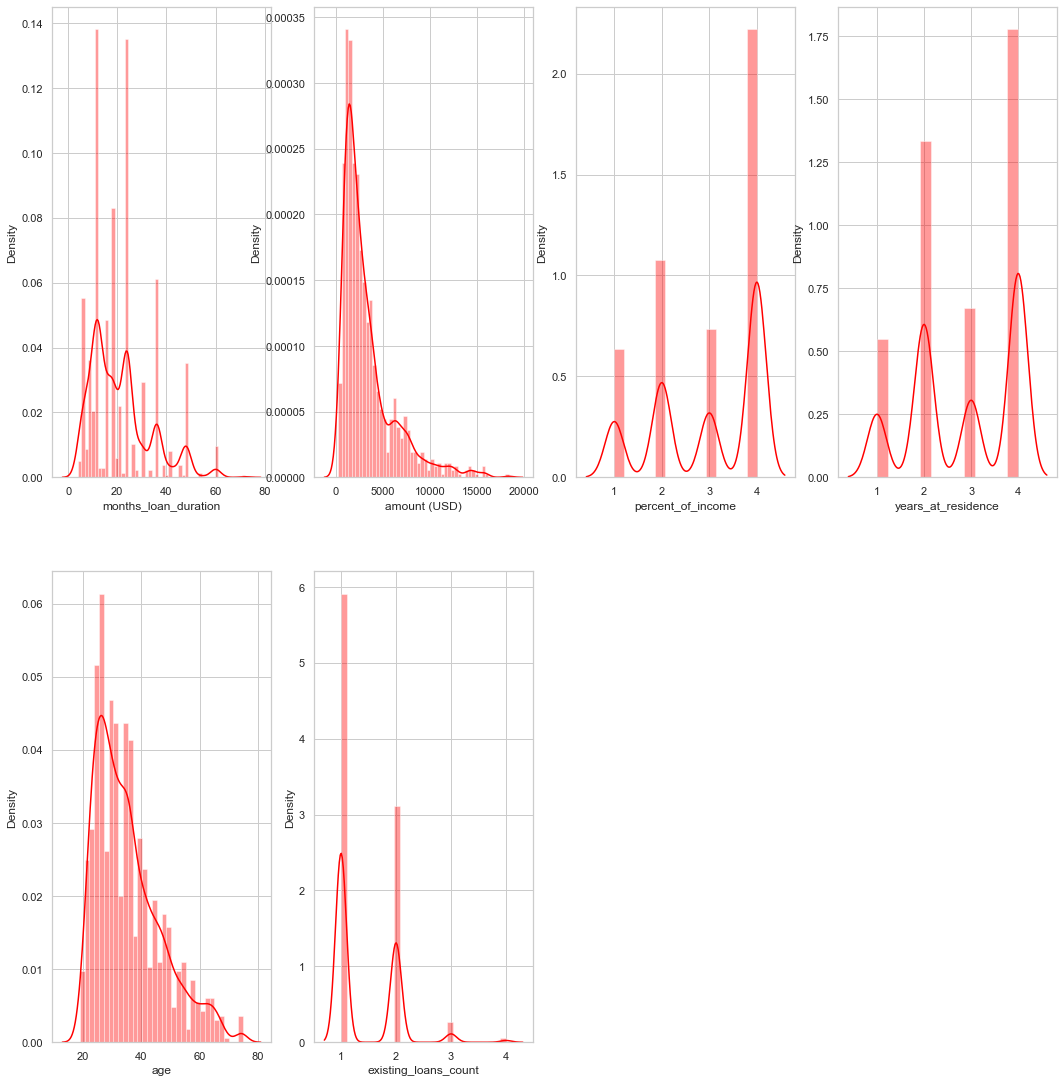

In [141]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l_numeric)):
    plt.subplot(0.5*number_of_rows + 1,0.5*number_of_columns,i+1)
    sns.distplot(data[l_numeric[i]],kde=True,color='red')

>> #####  None of the numeric columns seem to be normally distributed. Mostly they are right skewed.

# WOE & IV

- The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

- Positive WOE means Distribution of Goods > Distribution of Bads whereas Negative WOE means Distribution of Goods < Distribution of Bads

- It is calculated by taking the natural logarithm (log to base e) of division of % of non-events and % of events.

- Information value is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. 

- Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. In other words, it's designed mainly for binary logistic regression model. 

- We will write our own function to claculate the WOE and IV values.

- For our machine learing models we will use only those attributes that are scored as medium and strong predictors ignoring the rest of the columns.

#### ` Since, random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.`



In [30]:
def get_iv(df,feature,target):
    lst = []
    unq_val = df[feature].unique()
    for i in unq_val:
        lst.append([feature, # Feature name
        i, # Value of a feature (unique)
        df[(df[feature] == i) & (df[target] == 0)].count()[feature], # Good (Fraud == 0)
        df[(df[feature] == i) & (df[target] == 1)].count()[feature] # Bad (Fraud == 1)
        ])
    df1 = pd.DataFrame(lst,columns = ['variable','value','good','bad'])    
    total_good = df[df['default'] == 0].count()[feature]
    total_bad = df.shape[0]-total_good
    df1['distribution_good']= df1['good']/total_good
    df1['distribution_bad']= df1['bad']/total_bad
    df1['WOE'] = np.log(df1['distribution_good']/df1['distribution_bad'])
    df1 = df1.replace({'WOE':{np.inf:0,-np.inf:0}})
    df1["IV"] =  df1['WOE']*(df1['distribution_good']- df1['distribution_bad'])
    print("\n Information Value : ",df1['IV'].sum())
    a = df1['IV'].sum()
        
    return a  

#### We will use a loop to get the WOE and IV of each attribute and create a list of features that are determined to be as strong or medium accordning to their Information Values.

In [31]:
features = ['checking_balance', 'months_loan_duration',
        'credit_history', 'purpose', 'amount (USD)', 'savings_balance',
        'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
        'other_credit', 'housing', 'existing_loans_count', 'job', 'dependants',
        'phone']

selected_features = []

for i in features:
    print('\n Feature :', i)
    x = get_iv(data, i, 'default')
    if x < 0.02:
        print("\n This feature is useless for Prediction")
    elif x >= 0.02 and x < 0.1:
        print("\n This feature is a Weak Predictor")
    elif x >= 0.1 and x < 0.3:
        print("\n This feature is a Medium Predictor")
        selected_features.append(i)
    elif x >= 0.3 and x < 0.5:
        print("\n This feature is a Strong Predictor")
        selected_features.append(i)
    else:
        print("\n This feature is suspicious or too good to be true")
    print('\n')
    print('*' * 100)
    
    


 Feature : checking_balance

 Information Value :  0.6660115033513336

 This feature is suspicious or too good to be true


****************************************************************************************************

 Feature : months_loan_duration

 Information Value :  0.30953743099843883

 This feature is a Strong Predictor


****************************************************************************************************

 Feature : credit_history

 Information Value :  0.2932335473908263

 This feature is a Medium Predictor


****************************************************************************************************

 Feature : purpose

 Information Value :  0.03835478242959107

 This feature is a Weak Predictor


****************************************************************************************************

 Feature : amount (USD)

 Information Value :  0.04210822801901128

 This feature is a Weak Predictor


*******************************************

In [32]:
# we can see what features are determined as useful by our function
selected_features

['months_loan_duration', 'credit_history', 'savings_balance', 'age']

### One Hot Encoding
- Now that we have completed WOE and IV we will check to see the object types in ur dataset and use one hot encoding to create flag variables so that we can perform PCA and run the machone learning models to determine defaulters.

- Although there are various ways to deal with object datatypes we will be using one hot encoding because we cannot rank some types of categories as either better or worse than the other therefore assigning integers to them would not be correct.

- Although some machine learning algorithms can work directly with categorical data depending on implementation, such as a decision tree, but most require any inputs or outputs variables to be a number, or numeric in value. This means that any categorical data must be mapped to integers.

- One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

- One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

- While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.

In [33]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

checking_balance       4
credit_history         5
purpose                6
savings_balance        5
employment_duration    5
other_credit           3
housing                3
job                    4
dtype: int64

In [34]:
dummy_dataframe_flags = pd.get_dummies(data, columns = ['checking_balance', 'credit_history', 'purpose',
                                                       'savings_balance', 'employment_duration', 'other_credit',
                                                       'housing', 'job'])

In [35]:
data = data.drop(['checking_balance', 'credit_history', 'purpose',
                'savings_balance', 'employment_duration', 'other_credit',
                'housing', 'job'], axis=1)

In [36]:
data = data.merge(dummy_dataframe_flags, how='left')

# SMOTE

- Using imbalanced data, we may have a model that appears very accurate, while it actually is useless! This is where SMOTE (Synthetic Minority Oversampling Technique) comes in.
- SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. SMOTE can be seen as an advanced version of oversampling, or as a specific algorithm for data augmentation. The advantage of SMOTE is that you are not generating duplicates, but rather creating synthetic data points that are slightly different from the original data points.
- Although our dataset is pretty balanced as we can see from our above visuals, we will still use SMOTE and visualize our data to get a better feel. 
##### We willl not be using the resampled data for our model predictions, we are simply viewing it for academic purposes.

In [37]:
# Prepping the data
x = data.drop(columns=['default'],axis=1).values
y = data['default'].values

In [38]:
# Define the resampling method
method = SMOTE()

In [39]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(x,y)

In [40]:
def plot_graph(x:np.ndarray, y:np.ndarray):
    plt.figure(figsize=(10,10))
    plt.scatter(x[y==0,1],x[y==0,2], label=' 0')
    plt.scatter(x[y==1,1],x[y==1,2], label=' 1', c='r')
    plt.legend()
    return plt.show()

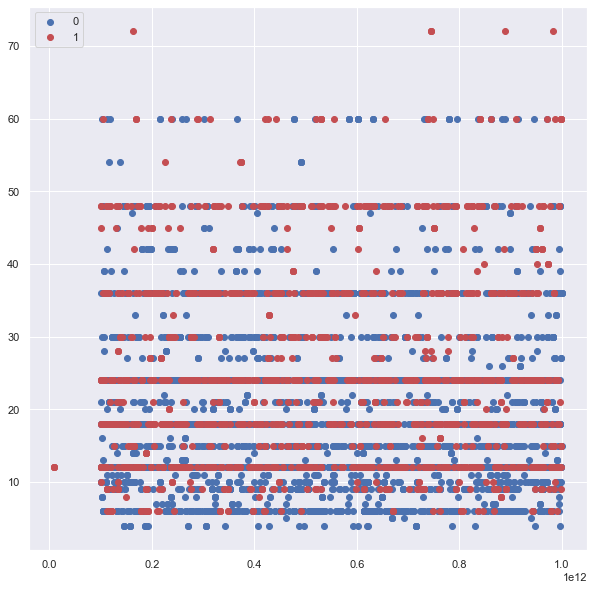

In [41]:
plot_graph(x,y)

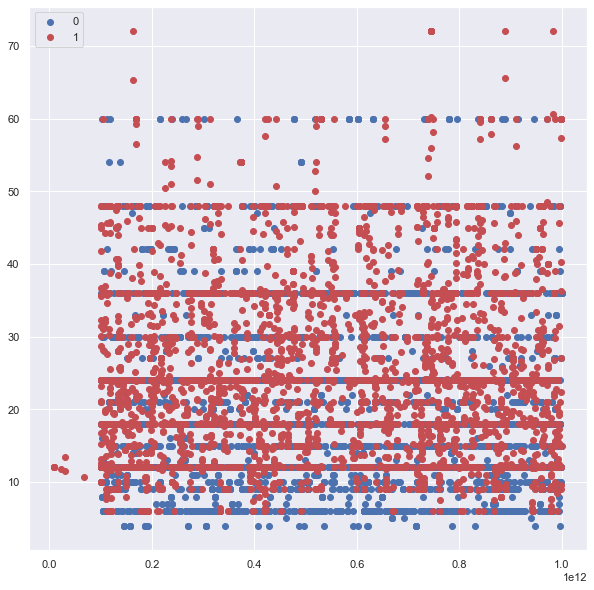

In [42]:
plot_graph(X_resampled,y_resampled)

# Trying the different models

- Prepping the data. This involves splitting the data into two dataframes wherein the fearures are stored in one dataframe and the target value (which is the default in the present case)  is stored in the second datafarame. 
- At this stage we can choose the columns we wish to retain or not, also known as feature extraction. At present we will retain all the columns in our first set except the customer_id and account_no columns, since these add no value. 
- We have performed this step above when we did SMOTE.
- We will use PCA for feature extraction and run a few models so that we can compare ot to the models we run with attributes chosen using WOE and IV.
- Since we have already converted the non-numerical datapoints, taken care of the null values and prepped the data we can straightaway move on to PCA and Model Prediction.

# Principal Component Analysis

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [43]:
 def pca_model_results(x, y, model,comp):
    pca = PCA(n_components=comp)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.fit_transform(X_test)
    
    print('PCA Explained Variance ratio: ', pca.explained_variance_ratio_)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
     # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)

### PCA - LOGISTIC REGRESSION

In [44]:
model = LogisticRegression()
pca_model_results(x,y,model,3)

PCA Explained Variance ratio:  [1.00000000e+00 9.68095103e-15 1.22223212e-16]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.49      0.59       854
           1       0.30      0.54      0.39       346

    accuracy                           0.51      1200
   macro avg       0.51      0.52      0.49      1200
weighted avg       0.60      0.51      0.53      1200

Confusion matrix:
 [[421 433]
 [158 188]]


###  PCA - DESCISION TREES 

In [45]:
model = DecisionTreeClassifier()
pca_model_results(x,y,model,3)  

PCA Explained Variance ratio:  [1.00000000e+00 1.15964594e-16 1.94462776e-21]
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.37      0.49       831
           1       0.33      0.69      0.44       369

    accuracy                           0.47      1200
   macro avg       0.53      0.53      0.47      1200
weighted avg       0.60      0.47      0.47      1200

Confusion matrix:
 [[306 525]
 [115 254]]


###  PCA - NAIVE BAYES

In [46]:
m = GaussianNB()
pca_model_results(x,y,model,3) 

PCA Explained Variance ratio:  [1.00000000e+00 9.65168428e-15 1.08497980e-16]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.66      0.70       849
           1       0.35      0.44      0.39       351

    accuracy                           0.60      1200
   macro avg       0.55      0.55      0.54      1200
weighted avg       0.63      0.60      0.61      1200

Confusion matrix:
 [[563 286]
 [197 154]]


- We can see from the above output that the PCA is not working very well. 
- Further, PCA does not allow us any control over the choice of features only the number of components. 
- PCA seems is pretty inaccurate for most models.
- We will next use different machine learning models using the WOE & IV selected_features.

## Function to Run Models
- We create a function to fit our data into the required models, perform the predictions and give us a confusion matrix as output. 
- We will call this function using different models. We will also have the random state set as 42 for our train test split so that we have consistent outputs and are better able to compare the different models. Our function will also give us the AUC score and print the ROC curve.
- We will first use it to run the different models using all the attributes and then just the selected_features.

In [47]:
def get_model_results(x, y, model, ts):
    
    # splitting the set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state = 42)
    
    # fitting the model
    model.fit(X_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(X_test)
    
    # comparing y_test to predictions and obtaining performance metrics
    # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)
    
    # checking the accuracy of our model
    print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.3f}')
    
    # getting AUC score
    probs = model.predict_proba(X_test)
    
    print(f'AUC:\n{roc_auc_score(y_test,probs[:,1])}')
    
    # printing the ROC curve
    
    print('ROC:\n')
    
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    

#    ML MODELS - Using all Attributes

### Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       836
           1       0.00      0.00      0.00       364

    accuracy                           0.70      1200
   macro avg       0.35      0.50      0.41      1200
weighted avg       0.49      0.70      0.57      1200

Confusion matrix:
 [[836   0]
 [364   0]]
Accuracy Score:
0.697
AUC:
0.5164407960460592
ROC:



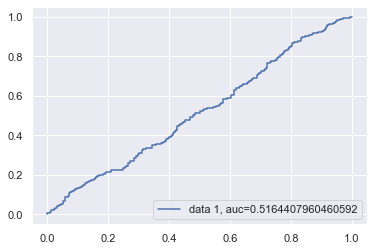

In [48]:
# defining the logistic regression model
m = LogisticRegression()

# calling our function
get_model_results(x,y,m,0.2)

### Descision Tree

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       836
           1       0.99      0.99      0.99       364

    accuracy                           0.99      1200
   macro avg       0.99      0.99      0.99      1200
weighted avg       0.99      0.99      0.99      1200

Confusion matrix:
 [[831   5]
 [  3 361]]
Accuracy Score:
0.993
AUC:
0.9928886902571114
ROC:



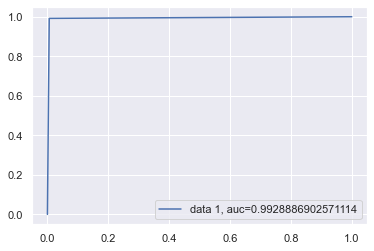

In [49]:
# defining the descision tree model
m = DecisionTreeClassifier()

# calling our function
get_model_results(x,y,m,0.2)

### Naive Bayes

Classification report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       836
           1       0.00      0.00      0.00       364

    accuracy                           0.70      1200
   macro avg       0.35      0.50      0.41      1200
weighted avg       0.49      0.70      0.57      1200

Confusion matrix:
 [[836   0]
 [364   0]]
Accuracy Score:
0.697
AUC:
0.4890142751984857
ROC:



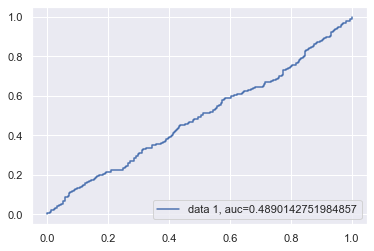

In [50]:
# defining the Naive Bayes Classifier
m = GaussianNB()

# calling our function
get_model_results(x,y,m,0.2)

### Random Forests

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      0.99      1.00       364

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Confusion matrix:
 [[836   0]
 [  2 362]]
Accuracy Score:
0.998
AUC:
0.9999999999999999
ROC:



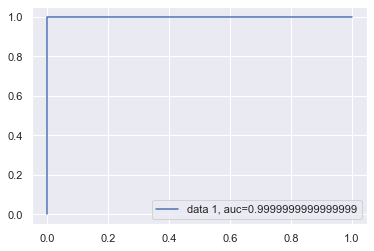

In [51]:
# defining the logistic regression model
m = RandomForestClassifier()

# calling our function
get_model_results(x,y,m,0.2)

#### As we can see our Descision Tree and random Forest Models are performing a bit too well and therefore we must be suspicisous of them. We do not want models that overfit, therefore these models are not of much use to us when we use all the attributes.

#    ML MODELS - Using WOE & IV Features

We will now use our selected_features whcih was the assignment requirement. Although we have selected only 4 features our model will take in more columns as we have created flag variables. We will now prep our data using just these 4 features. We selected the following features using WOE & IV
- months_loan_duration (strong)
- credit_history (medium)
- savings_balance (medium)
- age (medium)


In [52]:
selected_features = ['months_loan_duration', 'credit_history_critical', 'credit_history_good', 'credit_history_perfect',
                     'credit_history_poor', 'credit_history_very good', 'savings_balance_100 - 500 USD',
                     'savings_balance_500 - 1000 USD', 'savings_balance_< 100 USD', 'savings_balance_> 1000 USD', 
                     'savings_balance_unknown', 'age']

a = data[selected_features].values
b = data['default'].values


## Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       836
           1       0.66      0.27      0.39       364

    accuracy                           0.74      1200
   macro avg       0.71      0.61      0.61      1200
weighted avg       0.72      0.74      0.70      1200

Confusion matrix:
 [[786  50]
 [265  99]]
Accuracy Score:
0.738
AUC:
0.7242494347757505
ROC:



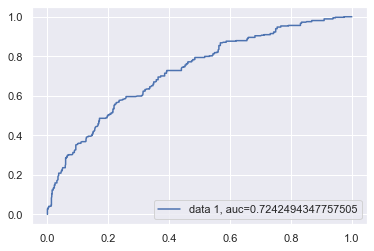

In [53]:
# defining the logistic regression model
m = LogisticRegression()

# calling our function
get_model_results(a,b,m,0.2)

## KNeighbors Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       836
           1       0.90      0.87      0.88       364

    accuracy                           0.93      1200
   macro avg       0.92      0.91      0.92      1200
weighted avg       0.93      0.93      0.93      1200

Confusion matrix:
 [[801  35]
 [ 49 315]]
Accuracy Score:
0.930
AUC:
0.9794268231768233
ROC:



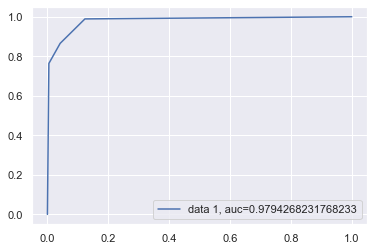

In [54]:
# defining the KNeighbirs model
m = KNeighborsClassifier(n_neighbors = 3)

# calling our function
get_model_results(a,b,m,0.2)

## Ada Boost Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.93      0.83       836
           1       0.62      0.25      0.36       364

    accuracy                           0.73      1200
   macro avg       0.68      0.59      0.59      1200
weighted avg       0.71      0.73      0.68      1200

Confusion matrix:
 [[781  55]
 [273  91]]
Accuracy Score:
0.727
AUC:
0.7416645854145856
ROC:



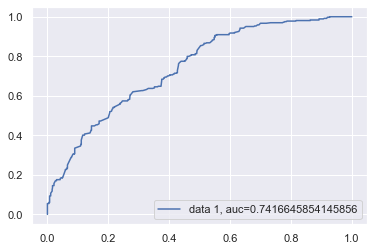

In [55]:
# defining the Ada Boost Classifier
m = AdaBoostClassifier(base_estimator = None)

# calling our function
get_model_results(a,b,m,0.2)

## Naive Bayes

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       836
           1       0.60      0.36      0.45       364

    accuracy                           0.73      1200
   macro avg       0.68      0.63      0.63      1200
weighted avg       0.71      0.73      0.71      1200

Confusion matrix:
 [[748  88]
 [234 130]]
Accuracy Score:
0.732
AUC:
0.7031422524843578
ROC:



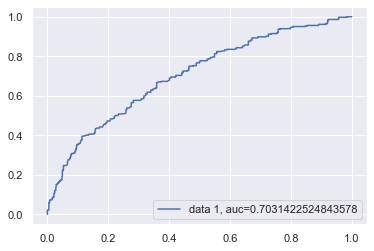

In [56]:
# defining the Naive Bayes Classifier
m = GaussianNB()

# calling our function
get_model_results(a,b,m,0.2)

## Descision Tree

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       836
           1       0.90      0.84      0.87       364

    accuracy                           0.92      1200
   macro avg       0.92      0.90      0.91      1200
weighted avg       0.92      0.92      0.92      1200

Confusion matrix:
 [[802  34]
 [ 59 305]]
Accuracy Score:
0.922
AUC:
0.9864116147010884
ROC:



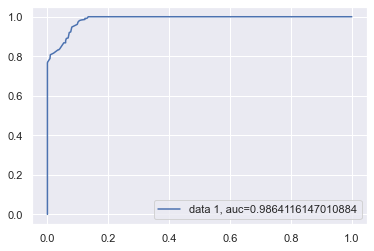

In [57]:
# defining the descision tree model
m = DecisionTreeClassifier()

# calling our function
get_model_results(a,b,m,0.2)

## Random Forests

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       836
           1       0.90      0.84      0.87       364

    accuracy                           0.92      1200
   macro avg       0.92      0.90      0.91      1200
weighted avg       0.92      0.92      0.92      1200

Confusion matrix:
 [[802  34]
 [ 59 305]]
Accuracy Score:
0.922
AUC:
0.9864116147010884
ROC:



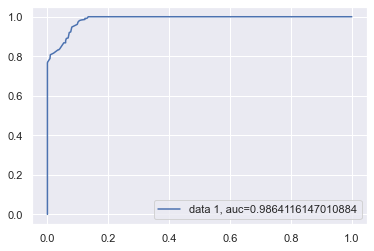

In [58]:
# defining the random forests model
model = RandomForestClassifier()

# calling our function
get_model_results(a,b,m,0.2)

##  Random Forests with n_estimator

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       836
           1       0.90      0.84      0.87       364

    accuracy                           0.92      1200
   macro avg       0.92      0.90      0.91      1200
weighted avg       0.92      0.92      0.92      1200

Confusion matrix:
 [[802  34]
 [ 59 305]]
Accuracy Score:
0.922
AUC:
0.9864116147010884
ROC:



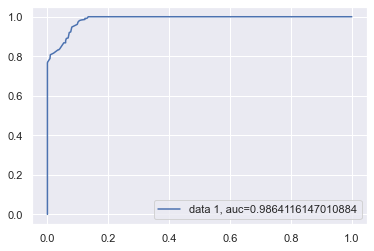

In [59]:
# defining the random forests model with n_estimators
model = RandomForestClassifier(n_estimators = 10)

# calling our function
get_model_results(a,b,m,0.2)

## Random Forests with model options

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57       836
           1       0.42      1.00      0.59       364

    accuracy                           0.58      1200
   macro avg       0.71      0.70      0.58      1200
weighted avg       0.82      0.58      0.58      1200

Confusion matrix:
 [[332 504]
 [  0 364]]
Accuracy Score:
0.580
AUC:
0.8869912981755087
ROC:



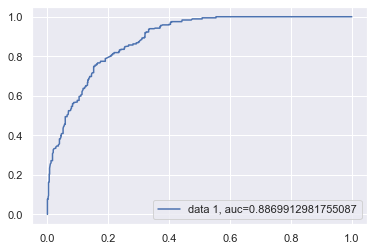

In [60]:
# Change the model options
m = RandomForestClassifier(bootstrap=True,
class_weight={0:1, 1:12},
criterion='entropy',
max_depth=10,
min_samples_leaf=10,
n_estimators=20,
n_jobs=-1)

# calling the function
get_model_results(a,b,m,0.2)

# Final Code - CHOOSING THE BEST MODEL

- Looking at the above outputs, we can safely choose Descision Tree Classifier using WOE & IV as our final model since it has the highest accuracy score. 
- In addition to the overall accuracy the f1- scores of both the Negative and Positive results are very high too. 
- These numbers are closely followed by Random Forest as our second best model, however as we have stated above Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.
- Overall Descision Tree Classifier has given us the best results. 
- The Descision Tree code is reproduced hereinbelow for easy reference.

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       836
           1       0.90      0.84      0.87       364

    accuracy                           0.92      1200
   macro avg       0.92      0.90      0.91      1200
weighted avg       0.92      0.92      0.92      1200

Confusion matrix:
 [[802  34]
 [ 59 305]]
Accuracy Score:
0.922
AUC:
0.9864116147010884
ROC:



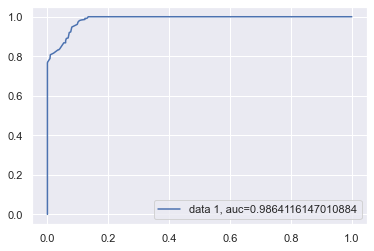

In [61]:
# defining the descision tree model
m = DecisionTreeClassifier()

# calling our function
get_model_results(a,b,m,0.2)